# 11. Signal Detection Theory 

 ## 11.1 Signal Dtection Theory

   -   two-alternative forced choice experiments
   -   2 × 2 table of counts to distinguish the responses from noise and real signal


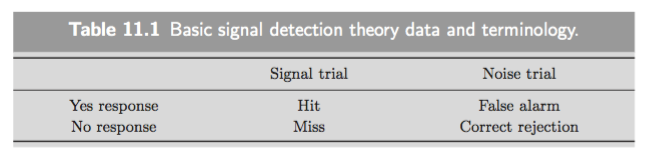

In [21]:
from IPython.display import Image
Image(filename='chap11_t1.png')

     
     
 ### Equal variance Gaussian signal detection theory
 
  - d : a measure of the discriminability of the signal trials from the noise trials, it corresponds to the distance between the two distributions
  - d/2 :  signal and noise trials are equally likely to occur, unbiased responding 
  - c   :  a measure of bias, corresponding to how different the actual criterion is from the unbiased one. 
  - c > 0 : a bias towards saying no, and so to an increase in correct rejections at the expense of an increase in misses.
  - c < 0 : Negative values of c correspond to a bias towards saying yes, and so to an increase in hits at the expense of an increase in false alarms.
  
  
 ### Discriminability is a measure of how easily signal and noise trials can be distinguished. Bias is a measure of how the decision-making criterion being used relates to the optimal criterion.
      

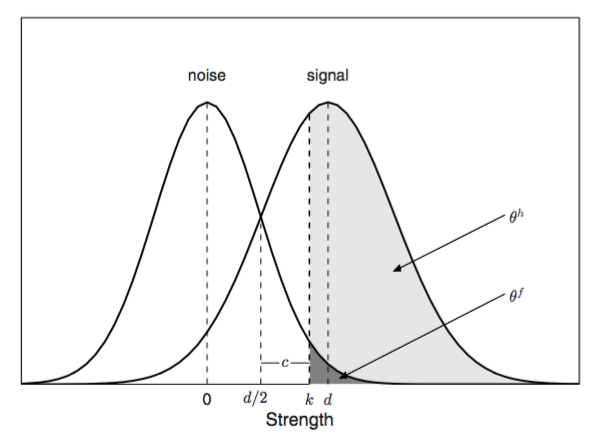

In [6]:
Image(filename='chap11_fig1.png') 

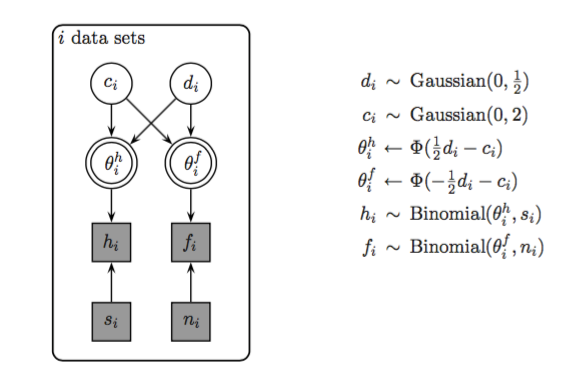

In [7]:
Image(filename='chap11_fig2.png') 

    - data set 1 : 70 hits/100 sig and 50 false/100 sig
    - data set 2 : 7 hits/10 sig and 5 false/10 sig
    - data set 3 : 10 hits/10 sig and 0 false/10 sig 

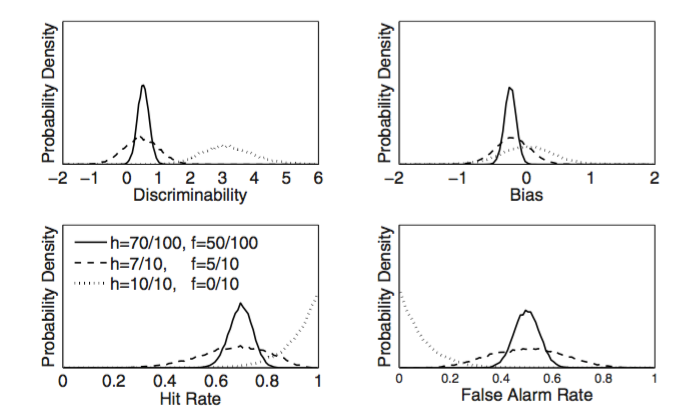

In [8]:
Image(filename='chap11_fig3.png') 

   ### Using python, the 3rd sample has results as follows:

In [4]:
#Image(filename='hit_.png') 

 [-----------------100%-----------------] 100000 of 100000 complete in 8.0 sec
Di:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.03            0.702            0.024            [-1.378  1.362]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-1.319           -0.524          -0.055         0.439         1.432
	

false_:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.958            0.994            0.034                  [ 0.  3.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.0              0.0             1.0            1.0           3.0
	

false:
 
	Mean           

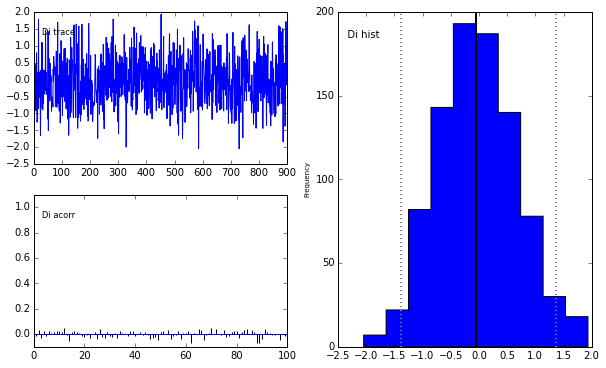

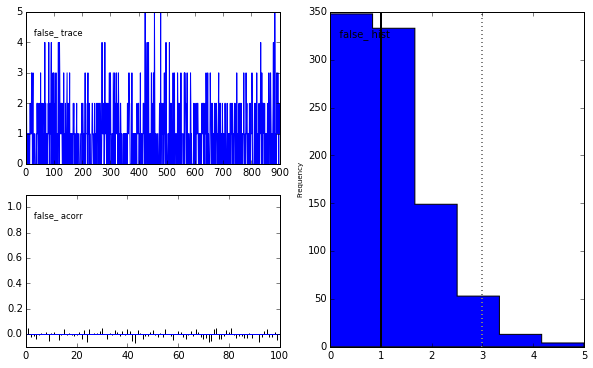

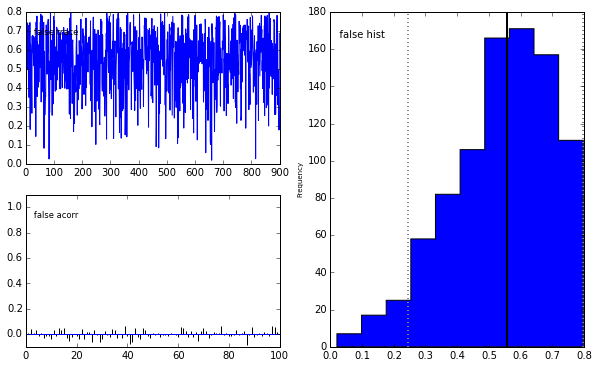

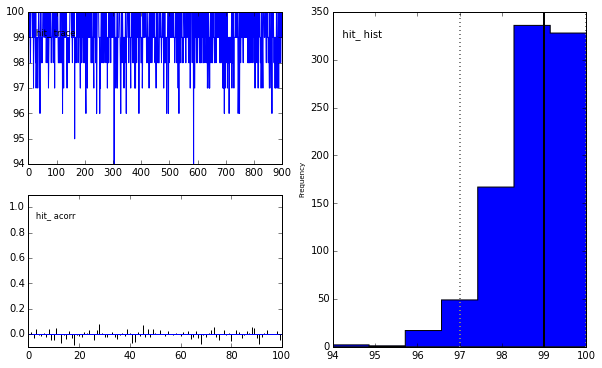

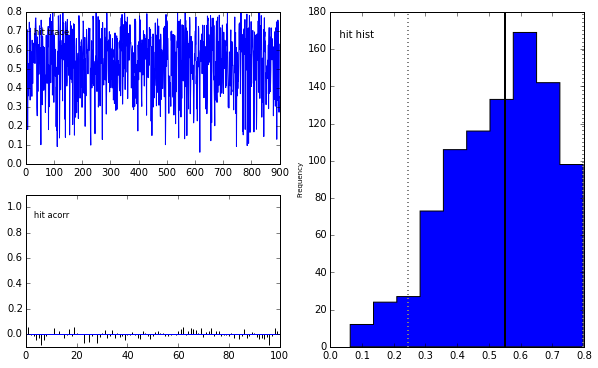

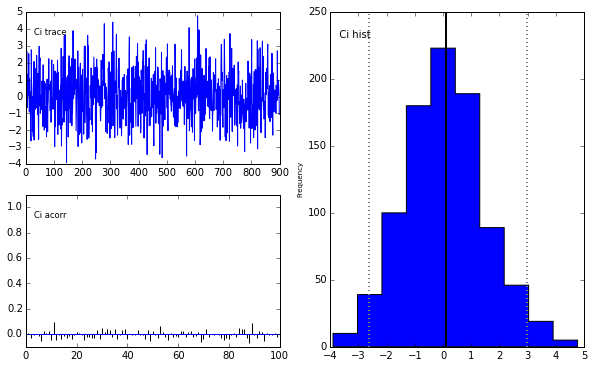

In [5]:
%matplotlib inline 

import pymc as pm
import numpy as np
#import pylab import hist, show                                                                                     


#mint =pm.Beta('Mint',alpha=1,beta=1)                                                                               
#coin0=pm.Bernoulli('coin01',p=mint,value=L1,observed=True)                                                         

__all__=[
    'Di',
    'Ci',
    'hit',
    'hit_',
    'false',
    'false_',
    'Si',
    'Ni'
    ]

Si=[100,10,10]
Ni=[100,10,10]

hit_d=[0.7,0.7,0.99]
false_d=[0.5,0.5,0.01]


Di=pm.Normal('Di',0,1/0.5)
Ci=pm.Normal('Ci',0,1/2.0)

#hit=pm.CGaussian1(Ci,Di)                                                                                           
#false=pm.CGaussian2(Ci,Di)                                                                                         


@pm.deterministic
def hit(C=Ci,D=Di):
    beta=D/2.0-C
#    print beta                                                                                                     
    if beta >= 0:
        return np.sqrt((1.00+np.exp(-beta))/np.pi)
    else:
        return np.sqrt((1.00-np.exp(beta))/np.pi)


@pm.deterministic
def false(C=Ci,D=Di):
    beta=-D/2.0-C
    if beta >=0:
        return np.sqrt((1.00+np.exp(-beta))/np.pi)
    else:
        return np.sqrt((1.00-np.exp(beta))/np.pi)


hit_=pm.Binomial('hit_',p=hit_d[2],n=Si[0])
false_=pm.Binomial('false_',p=false_d[2],n=Ni[0])

#M0=pm.Model(set([]))                                                                                               
#M0=pm.Model([h])                                                                                                   

#M=pm.MCMC([hit_d[2],false_d[2],hit_,false_,hit,false,Ci,Di])                                                       
M=pm.MCMC([Ci,Di,hit,false,hit_,false_])
M.sample(iter=100000,burn=10000,thin=100)

M.summary()
pm.Matplot.plot(M)



In [6]:
#Image(filename='false_.png') 

 ## 11.2 Hierarchical signal detection theory
 
  - Considering individual subject data
  - from the empirical evaluation, by Heit and Rotello (2005), of a conjecture made by Rips (2001)
  - empirical evidence for or against the SDT model has strong implications for the many-threaded contemporary debate over the existence of dif- ferent kinds of reasoning systems or processes
  - Heit and Rotello (2005) 
       - inductive and deductive judgments of 80 participants on eight arguments. 
       -  40 subjects were asked induction questions about the arguments (i.e., whether the conclusion was “plausible”), 
       - while the other 40 participants were asked deduction questions (i.e., whether the conclusion was “necessarily true”). 

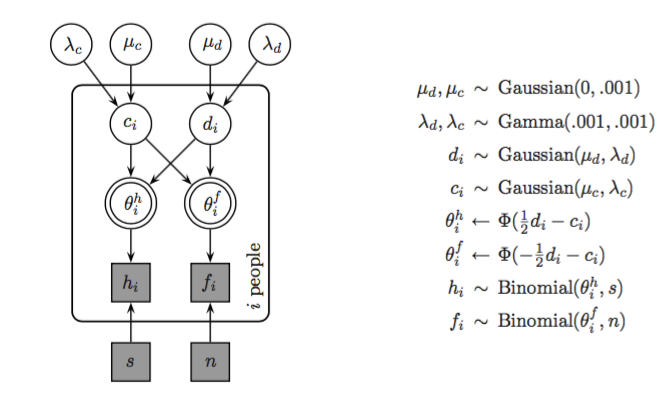

In [13]:
Image(filename='chap11_fig4.png') 

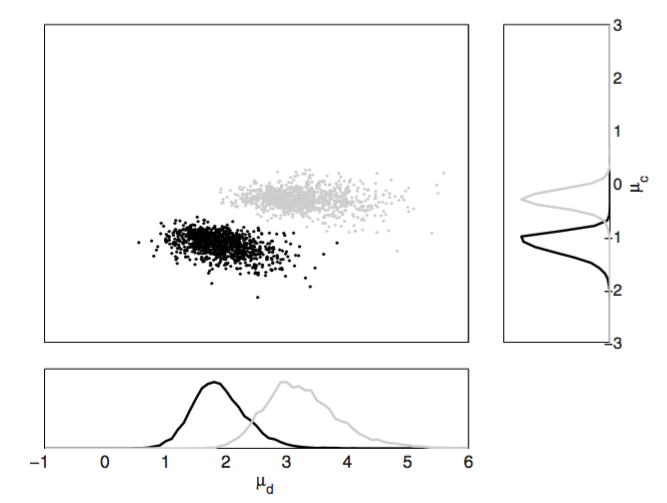

In [14]:
Image(filename='chap11_fig5.png') 

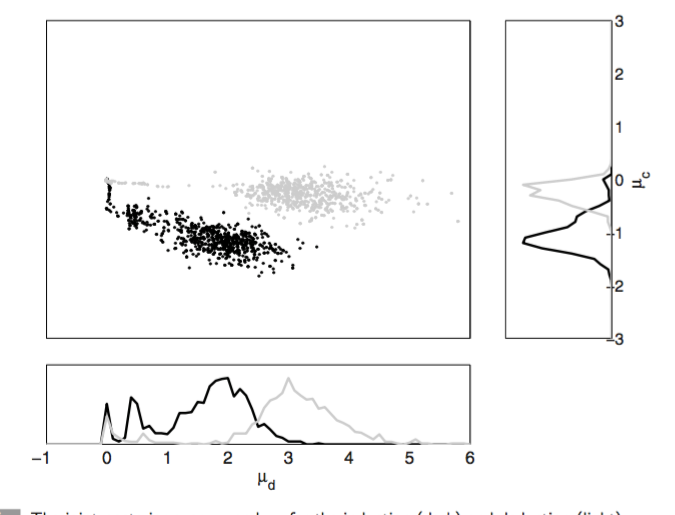

In [11]:
Image(filename='chap11_fig6.png') 



 ## 11.3 Parameter expansion 

   - Even after the introduction of a burn-in period, there is a sampling issue with the way the chains of the hierarchical variance parameter σc behave. 
   - As shown in Figure 11.7, the σc chains can get stuck near zero, with the samples around 2500 in the induction condition providing an especially good example.
   - This undesirable sampling behavior is fairly common in complicated hierarchical Bayesian models.
   - A good way to enable the sampling process to escape the trap is to use a tech- nique known as parameter expansion (e.g., Gelman, 2004; Gelman & Hill, 2007; Liu & Wu, 1999)
   -  extend the hierarchical signal detection model with two multiplicative parameters, say ξc and ξd.
   - See Winbugs code! 


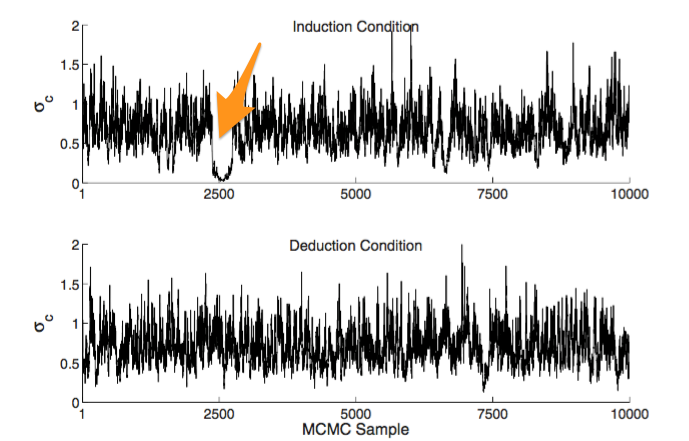

In [15]:
Image(filename='chap11_fig7.png') 

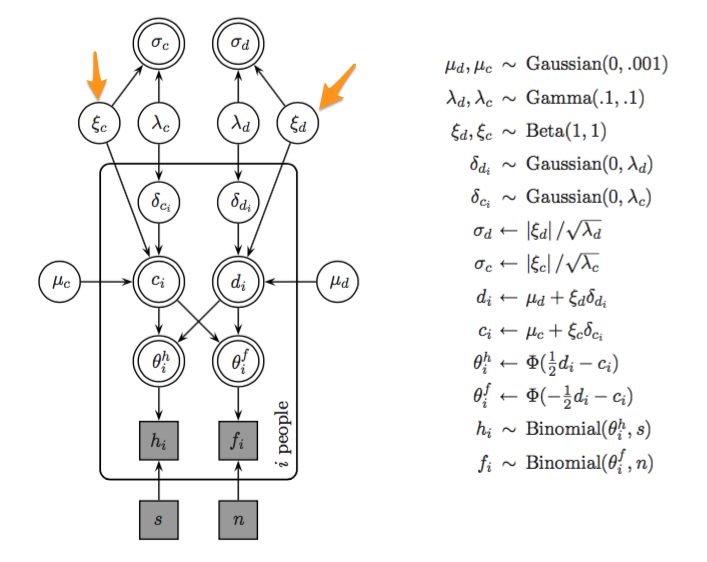

In [16]:
Image(filename='chap11_fig8.png') 